<div style='background-image: url("main.png") ; padding: 0px ; background-size: cover ; border-radius: 5px ; height: 200px ; width: 100%'>
    <div style="float: right ; margin: 20px ; padding: 20px ; background: rgba(255 , 255 , 255 , 0.9) ; width: 50% ; height: 150px">
        <div style="position: relative ; top: 50% ; transform: translatey(-50%)">
            <div style="font-size: xx-large ; font-weight: 900 ; color: rgba(0 , 0 , 0 , .8) ; line-height: 100%">Thermochimie
            </div>
            <div style="font-size: large ; padding-top: 20px ; color: rgba(0 , 0 , 0 , 0.5)">Premier principe | Température de flamme
             </div>
        </div>
    </div>
</div>

In [1]:
# commande permettant d'insérer les figures matplotlib dans les notebooks
%matplotlib widget

# import des librairies 
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Mise en œuvre du problème physique
##  Partie cinétique
On modélise le milieu réacionnel par une réaction quantitative de la forme :
$$\alpha\text{A}\to\beta\text{B}$$

&nbsp;
On supposera que la réaction admet un ordre $p$, ce qui permet d'établir l'égalité : 
$$-\dfrac{1}{\alpha}\dfrac{\text{d}\left[\text{A}\right]}{\text{d}t}=k\left[\text{A}\right]^p$$

&nbsp;
La résolution de cette équation par la fonction `odeint` de la librairie `scipy` passe par l'écriture de cette équation sous la forme :
$$\dfrac{\text{d}\left[\text{A}\right]}{\text{d}t}=-k\alpha\left[\text{A}\right]^p=f(\left[\text{A}\right],t)$$

&nbsp;
On commence par renseigner les valeurs des données thermochimiques.

In [2]:
## Description du milieu réactionnel
C0 = 1.e3 # concentration initiale en réactifs en mol/m^3
V = (10e-3)*1e-3 # volume du réacteur isochore en m^3

### Données cinétiques
## La réaction est modélisée par alpha A -> beta B
alpha = 1 
beta = 1

p = 2 # ordre de la réaction (Rq : on évitera l'ordre 0 qui pose des problèmes pour la partie thermique non isolée)
k = 1 # constante de vitesse

La fonction $f$ est codée sous le nom `cich()`, l'intervalle de temps d'intérêt sous le nom `t` avec `N` valeurs. La durée totale choisie dépend de l'ordre cinétique de la réaction.

In [3]:
### Données numériques
N = 1000
if p==0 :
    t=np.linspace(0,3*C0/(2*k), N)
elif p==1:
    t=np.linspace(0,10*np.log(2)/k, N)
elif p==2:
    t=np.linspace(0,1000*1/(2*k*C0), N)

### Fonction à résoudre avec odeint
def cich(C,t):
    return [-k*alpha*(C[0])**p]

C_0=[C0] # avancement réactionnel initial
C = odeint(cich,C_0,t)

C_t = C[:]

On peut alors tracer l'évolution de la concentration en réactifs au cours du temps.

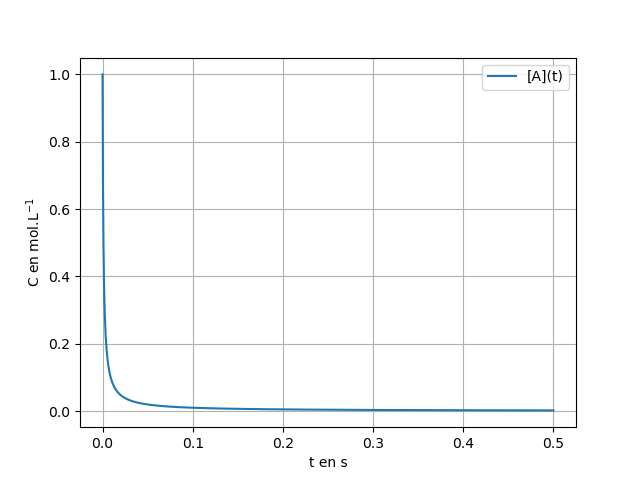

In [4]:
plt.figure()
plt.plot(t,C/1000, label="[A](t)")
plt.xlabel('t en s')
plt.ylabel(r'C en mol.L$^{-1}$')
plt.legend()
plt.grid(True)
plt.show()

## Partie thermodynamique
### Parois adiabatiques
On suppose que le milieu réactionnel est homogène, placé dans une enveloppe calorifugée, l'énergie thermique évacuée est alors nulle.</br>
Si la réaction est non seulement isochore mais également isobare, le premier principe s'écrit alors :
$$\text{d}H=\delta Q_p$$
où $\delta Q_p$ est l'énergie thermique libérée par la réaction.</b>

Sous les approximations usuelles, cette énergie thermique se déduit de la relation $\delta Q_p=-\Delta_\text{r}H^\circ \text{d}\xi$, où $\xi$ est l'avancement réactionnel tel que $n_A=n_A^0 - \alpha\xi$.</b>

Avec les lois de Joule, $\text{d}H=C_v\text{d}T$, on en déduit :
$$T=T_0 - \dfrac{\Delta_\text{r}H^\circ \times V}{C_v \alpha}\left(C_0-\left[\text{A}\right]\right)$$

On peut alors tracer l'évolution de la température au cours du temps.

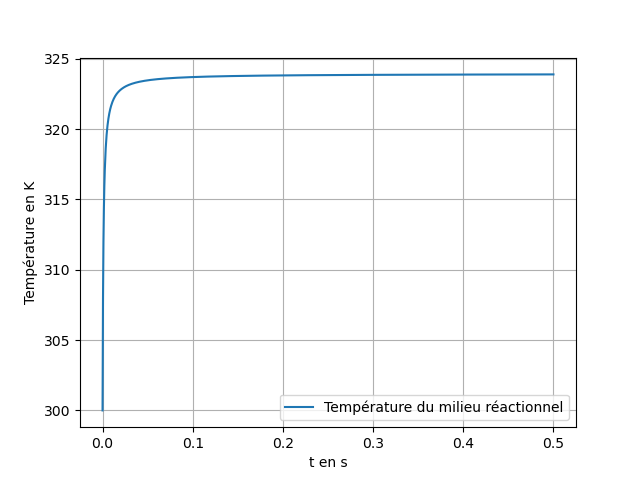

In [5]:
### Données thermodynamiques
T0 = 300 # température initial en kelvin
DrH0 = -100e3 # enthalpie standard de réaction en J/mol
cv = 4185 # capacité thermique massique du solvant en J/kg/K
rho = 998 # masse volumique du solvant en kg/L
Cp = rho*cv*V # capacité thermique à volume constant du solvant en J/K

### Calcul de la température du milieu réactionnel
T = T0-DrH0*(C0-C)/(alpha*rho*cv)

plt.figure()
plt.plot(t,T, label='Température du milieu réactionnel')
plt.legend()
plt.xlabel('t en s')
plt.ylabel('Température en K')
plt.grid(True)
plt.show()

### Pertes thermiques pariétales
Si l'enceinte n'est pas calorifugée, on peut modéliser les pertes thermique par la loi de Newton :
$$\mathcal{P}=hS(T_\text{ext}-T)$$

&nbsp;
En conservant les autres hypothèses (isobare, milieu homogène...), il vient l'équation différentielle : 
$$\rho V c_v \dfrac{\text{d}T}{\text{d}t}=\dfrac{\Delta_\text{r}H^\circ \times V}{C_v \alpha} \dfrac{\text{d}\left[\text{A}\right]}{\text{d}t} - hS(T_\text{ext}-T) = -k\dfrac{\Delta_\text{r}H^\circ}{\rho c_v} \left[\text{A}\right]^p + hS(T_\text{ext}-T)$$

&nbsp;
Les équations thermique et cinétique sont couplées mais la méthode `odeint` permet de résoudre ce système d'équations différentielles en codant cette fois une nouvelle fonction $f$, sous le nom `thermo()`.
$$f(X,t)=\left[\begin{array}{c}
-k\dfrac{\Delta_\text{r}H^\circ}{\rho c_v} \left[\text{A}\right]^p + hS(T_\text{ext}-T) \\
-k\left[\text{A}\right]^p
\end{array}\right]$$

&nbsp;
où $$X=\left[\begin{array}{c}T\\\left[\text{A}\right]\end{array}\right]$$

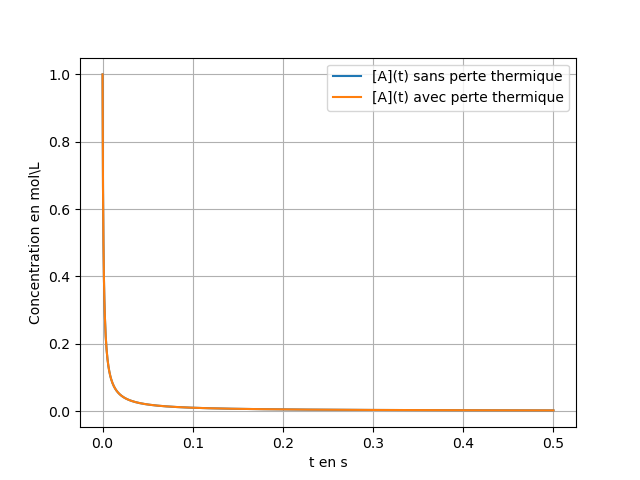

In [6]:
h = 10
S = 12e-2*10e-2

def thermo(X,t):
    T=X[0]
    C=X[1]
    return [-k*DrH0/(rho*cv)*C**p + h*S*(T0-T), -k*alpha*C**p]

T_0=[T0,C0]

TC = odeint(thermo, T_0, t)

T_new=TC[:,0]
C_new=TC[:,1]

plt.figure()
plt.plot(t,C/1000, label='[A](t) sans perte thermique')
plt.plot(t,C_new/1000, label='[A](t) avec perte thermique')
plt.legend()
plt.xlabel('t en s')
plt.ylabel('Concentration en mol\L')
plt.grid(True)
plt.show()

Comme attendu, la courbe d'évolution de la concentration n'est pas affectée par le nouveau modèle thermique.

&nbsp;
Par contre, les pertes thermiques se remarquent sur la courbe d'évolution de la température au cours du temps.

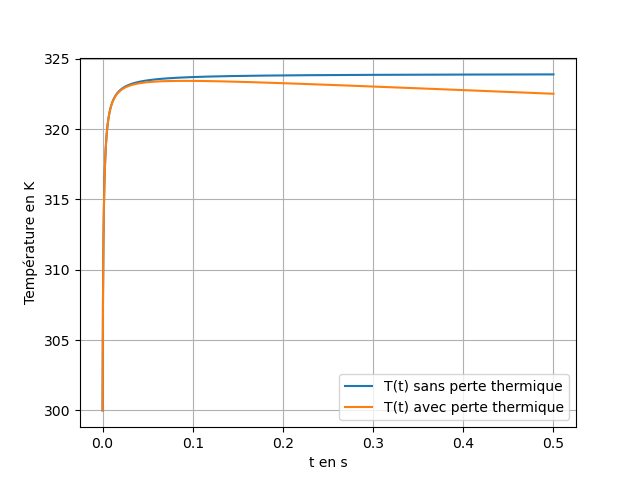

In [7]:
plt.figure()
plt.plot(t,T, label='T(t) sans perte thermique')
plt.plot(t,T_new, label='T(t) avec perte thermique')
plt.legend()
plt.xlabel('t en s')
plt.ylabel('Température en K')
plt.grid(True)
plt.show()

On remarque immédiatement que les températures maximales atteintes diffèrent largement entre les deux modèles. La mesure d'une température de flamme est donc impactée par les pertes thermique inhérentes à un milieu non parfaitement calorifugé.

### Mesure de la température de flamme
On peut néanmoins s'approcher au plus près de la valeur maximale adiabatique en linéarisant et en prolongeant la partie décroissante de la loi horaire de température avec perte thermique. Cette méthode dite de compensation permet d'obtenir une valeur approchée honorable de la température de flamme.

In [8]:
a,b = np.polyfit(t[N//2:],T_new[N//2:],1)

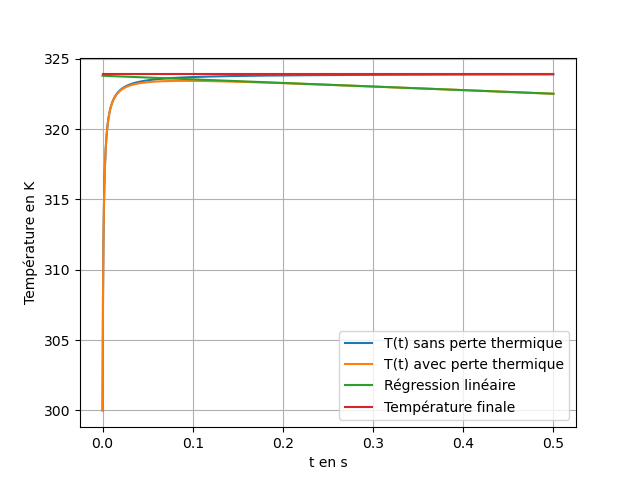

La température de flamme adiabatique est 323.9 K
La température de flamme avec perte est 323.4 K
La température de flamme extrapolée est 323.8 K


In [9]:
plt.figure()
plt.plot(t,T, label='T(t) sans perte thermique')
plt.plot(t,T_new, label='T(t) avec perte thermique')
plt.plot(t,a*t+b, label='Régression linéaire')
plt.plot([0,np.max(t)],[np.max(T), np.max(T)], label='Température finale')
plt.legend()
plt.xlabel('t en s')
plt.ylabel('Température en K')
plt.grid(True)
plt.show()

print('La température de flamme adiabatique est',format(np.max(T), "#.1f"),'K')
print('La température de flamme avec perte est',format(np.max(T_new), "#.1f"),'K')
print('La température de flamme extrapolée est',format(b, "#.1f"),'K')